<a href="https://colab.research.google.com/github/kaufmann01/kaufmann01/blob/main/flashcrash_probalility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving ohlcv5mRecent.csv to ohlcv5mRecent.csv


In [ ]:
import io
import pandas as pd
import datetime as dt



df = pd.read_csv(io.BytesIO(uploaded['ohlcv5mRecent.csv']))



In [ ]:
%pip install mplfinance
%pip install backtrader
%pip install tensorflow

In [ ]:
import backtrader as bt
import mplfinance as mpf
import matplotlib.pyplot as plt

Saving ohlcv5mRecent.csv to ohlcv5mRecent (3).csv


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


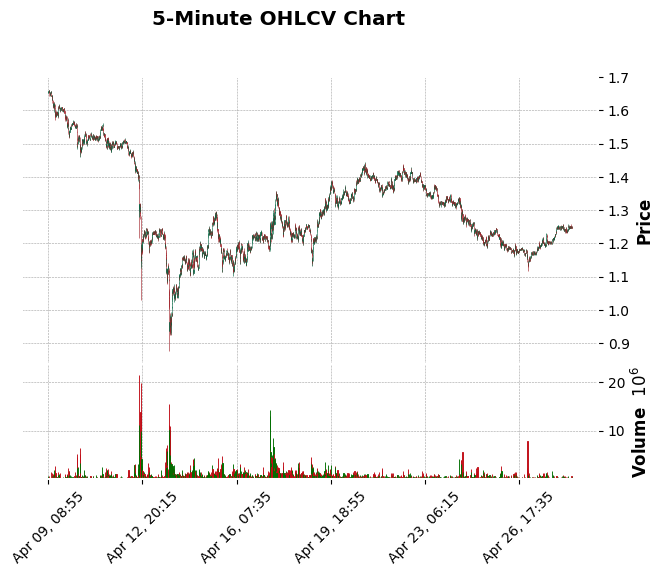

In [ ]:
def create_candlestick_chart(data):
    # Convert 'Timestamp' column to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Set 'Timestamp' as the index
    data.set_index('Timestamp', inplace=True)

    # Specify the style and size of the plot
    mpf_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'figure.figsize': (12, 8)})

    # Create the candlestick chart
    mpf.plot(data, type='candle', style=mpf_style, title='5-Minute OHLCV Chart', volume=True)


# Upload the CSV file
uploaded = files.upload()
file_name = next(iter(uploaded))  # Get the name of the uploaded file

# Load the data from the CSV file
data = pd.read_csv(file_name)

# Call the function with the loaded data
create_candlestick_chart(data)

In [3]:
import numpy as np
import pandas as pd
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to prepare data for LSTM
def prepare_data(data, n_features):
    X, y = [], []
    for i in range(len(data) - n_features - 1):
        X.append(data[i:(i + n_features)])
        y.append(data[i + n_features])
    return np.array(X), np.array(y)

# Load and prepare your data
def load_and_prepare_data(filename, n_features):
    data = pd.read_csv(filename)
    data['Close'] = data['Close'].astype(float)

    # Normalize the 'Close' prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    # Prepare data for LSTM
    X, y = prepare_data(data_scaled, n_features)

    # Reshape X for model training
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Main function to run the training and prediction
def run_model():
    from google.colab import files
    uploaded = files.upload()
    filename = next(iter(uploaded))

    n_features = 10  # Number of past intervals we want to use to predict the future
    X, y, scaler = load_and_prepare_data(filename, n_features)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the LSTM model
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(n_features, 1)),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values

    # Evaluate the model
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    model.save('short5.h5')

# Execute the model run
run_model()

files.download('short5.h5')




Saving ohlcv5mRecent.csv to ohlcv5mRecent (1).csv
Epoch 1/50
139/139 [==============================] - 4s 6ms/step - loss: 0.0117
Epoch 2/50
139/139 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 3/50
139/139 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 4/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 5/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 6/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 7/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 8/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 9/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 10/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 11/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 12/50
139/139 [==============================] - 1s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>